# INTRODUCTION
The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments. <br>
## Attribute Information:

This problem has the following inputs: <br>
1. Frequency, in Hertzs.<br>
2. Angle of attack, in degrees.<br>
3. Chord length, in meters.<br>
4. Free-stream velocity, in meters per second.<br>
5. Suction side displacement thickness, in meters.<br>

The only output is:<br>
6. Scaled sound pressure level, in decibels. <br>

### source of dataset : 
https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

## Importing essentials

In [1]:
import os #for interacting with the operating system.
import pandas as pd #for reading dataset.
import matplotlib.pyplot as plt # for visualizing.
%matplotlib inline 
import seaborn as sns # for visualizing.
from sklearn.model_selection import train_test_split #for splitting the dataset.
from sklearn.utils import shuffle #for shuffling the dataset.
from sklearn.preprocessing import MinMaxScaler #for scaling the input features of dataset.
from sklearn.ensemble import RandomForestRegressor #for training the model.
from sklearn.metrics import mean_squared_error # for testing accuracy of the model.

## SETTING DATAPATH AND OTHER THINGS

In [2]:
path = '/media/kvac/DRIVE-D/datasets/airfoil_self_noise.dat'
data = pd.read_csv(path, sep='\t', usecols=[0,1,2,3,4,5], names=['Frequency','Angle of attack', 
                                                                           'Chord length', 'Free-stream velocity', 
                                                                           'Suction side displacement thickness', 
                                                                           'sound pressure level'],
              skiprows=1)
data.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,sound pressure level
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


## Checking the mean, standard deviation, and range of data

In [3]:
data.describe()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,sound pressure level
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,2887.769640,6.786818,0.136436,50.847137,0.011146,124.835034
std,3153.162983,5.917509,0.093471,15.569029,0.013153,6.900864
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.190000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.719000
75%,4000.000000,9.900000,0.228600,71.300000,0.015840,129.997750
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


## Checking the null values and data type of features

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 6 columns):
Frequency                              1502 non-null int64
Angle of attack                        1502 non-null float64
Chord length                           1502 non-null float64
Free-stream velocity                   1502 non-null float64
Suction side displacement thickness    1502 non-null float64
sound pressure level                   1502 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


## Correlation

In [5]:
data.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,sound pressure level
Frequency,1.000000,-0.273429,-0.002871,0.134339,-0.230457,-0.390686
Angle of attack,-0.273429,1.000000,-0.504259,0.059822,0.753336,-0.156027
Chord length,-0.002871,-0.504259,1.000000,0.002217,-0.220338,-0.236657
Free-stream velocity,0.134339,0.059822,0.002217,1.000000,-0.003413,0.125003
Suction side displacement thickness,-0.230457,0.753336,-0.220338,-0.003413,1.000000,-0.312632
sound pressure level,-0.390686,-0.156027,-0.236657,0.125003,-0.312632,1.000000


# Data Visualization

## Visualizing the Pairplot

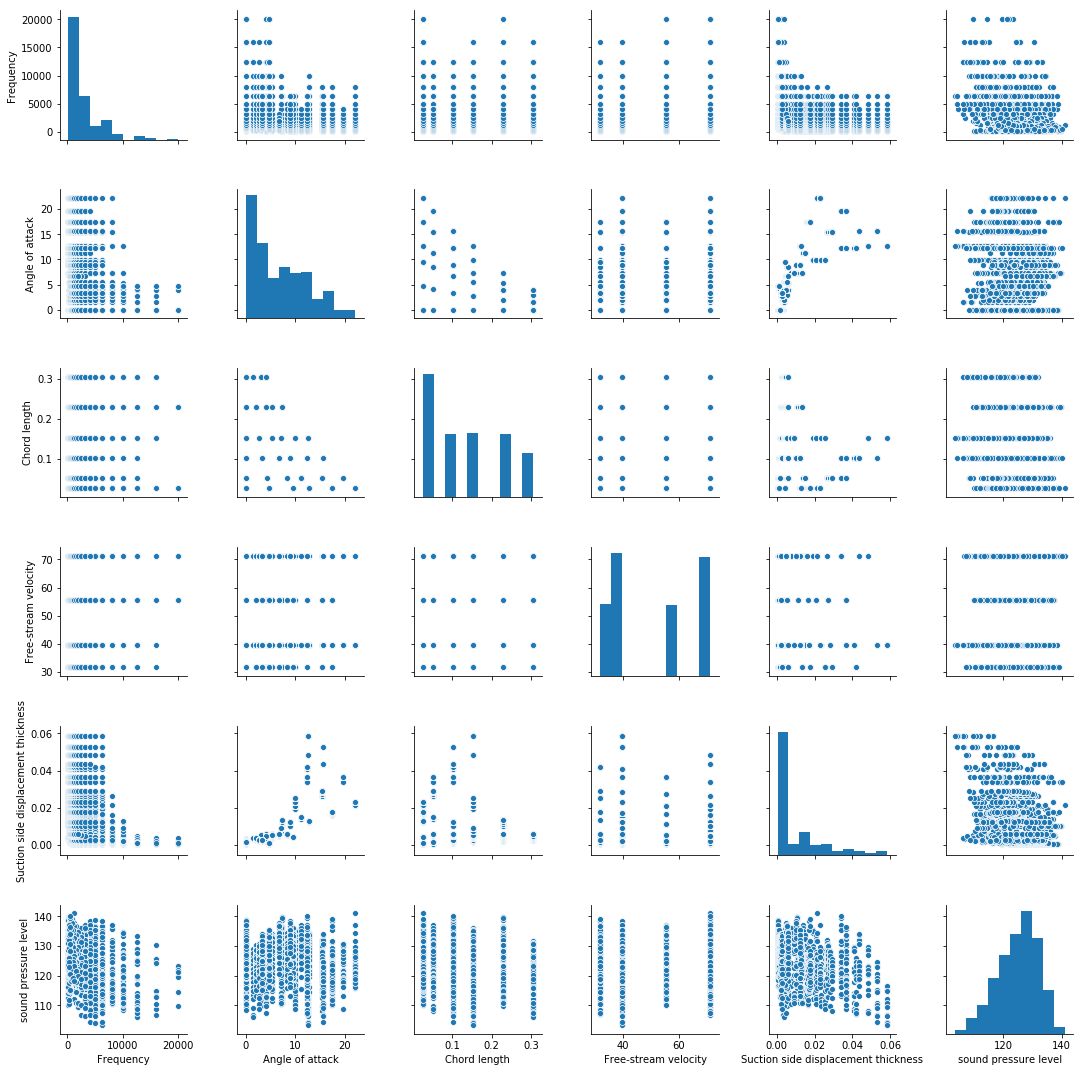

In [6]:
sns.pairplot(data)

## Frequency v/s sound pressure level

/home/kvac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


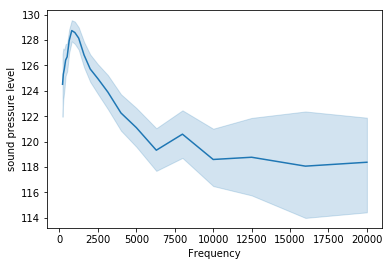

In [7]:
sns.lineplot(x='Frequency', y='sound pressure level', data=data)

## Angle of attack v/s sound pressure level

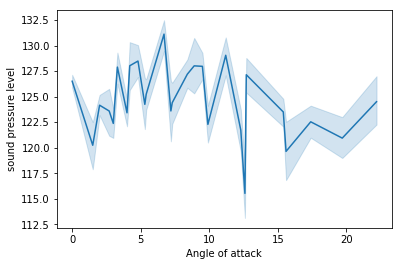

In [8]:
sns.lineplot(x='Angle of attack', y='sound pressure level', data=data)

## Chord length v/s sound pressure level

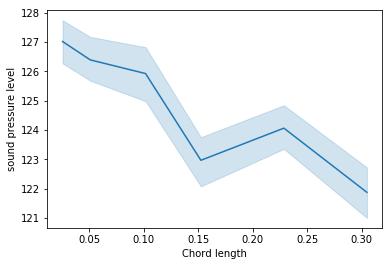

In [9]:
sns.lineplot(x='Chord length', y='sound pressure level', data=data)

## Free-stream velocity v/s sound pressure level

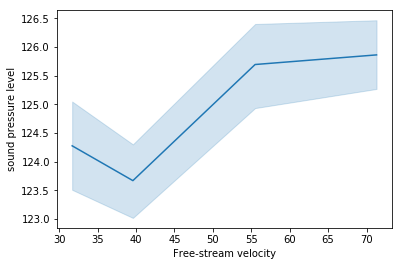

In [10]:
sns.lineplot(x='Free-stream velocity', y='sound pressure level', data=data)

## Suction side displacement thickness v/s sound pressure level

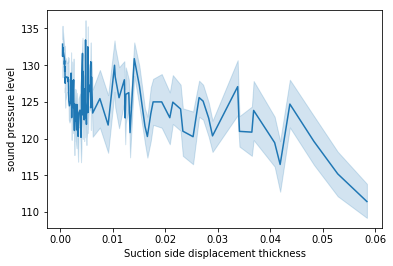

In [11]:
sns.lineplot(x='Suction side displacement thickness', y='sound pressure level', data=data)

## Shuffling the data

In [12]:
data = shuffle(data, random_state=0)

In [13]:
data.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,sound pressure level
1218,2500,22.2,0.0254,71.3,0.021418,126.097
9,8000,0.0,0.3048,71.3,0.002663,117.151
1411,400,12.3,0.1016,71.3,0.033779,139.428
1079,6300,9.5,0.0254,55.5,0.004328,124.222
901,200,15.4,0.0508,39.6,0.028259,121.783


## Setting the x and y

In [14]:
y = data['sound pressure level']
x= data.drop(['sound pressure level'], axis=1)

## Scale the data
### I used MinMaxScaler because -
Transforms features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [15]:
scalar = MinMaxScaler()
scalar_x = scalar.fit_transform(x)

/home/kvac/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [16]:
scalar_x

array([[0.11616162, 1.        , 0.        , 1.        , 0.36229778],
       [0.39393939, 0.        , 1.        , 1.        , 0.03900472],
       [0.01010101, 0.55405405, 0.27272727, 1.        , 0.57538635],
       ...,
       [0.07070707, 1.        , 0.        , 1.        , 0.36229778],
       [0.07070707, 0.24324324, 0.45454545, 0.6010101 , 0.06778411],
       [0.0530303 , 0.44594595, 0.45454545, 0.        , 0.42884939]])

In [17]:
scalar_x = pd.DataFrame(scalar_x, columns=['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 
                                           'Suction side displacement thickness'])

In [18]:
scalar_x.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness
0,0.116162,1.000000,0.000000,1.000000,0.362298
1,0.393939,0.000000,1.000000,1.000000,0.039005
2,0.010101,0.554054,0.272727,1.000000,0.575386
3,0.308081,0.427928,0.000000,0.601010,0.067707
4,0.000000,0.693694,0.090909,0.199495,0.480233


## Splitting the data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scalar_x, y, random_state=0)

## Initializing the model

In [20]:
model = RandomForestRegressor()

## Fitting the model

In [21]:
model.fit(X_train, y_train)

/home/kvac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## Predicting

In [22]:
y_predict = model.predict(X_test)

## Calculating the mean square error

In [23]:
mean_squared_error(y_test, y_predict)

3.3462083966223437